In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("online_sales_orders.csv")

In [ ]:
# Creating a new SQLite database and connect

conn = sqlite3.connect("online_sales.db")
df.to_sql("orders", conn, if_exists="replace", index=False)
cursor = conn.cursor()

1000

In [ ]:
#  query to analyze monthly revenue and order volume
query_monthly_summary="""
SELECT 
    STRFTIME('%Y-%m', order_date) AS month,
    SUM(amount) AS total_revenue,
    COUNT(DISTINCT order_id) AS total_orders
FROM orders
GROUP BY month
ORDER BY month
"""
monthly_summary_df = pd.read_sql_query(query_monthly_summary, conn)


In [13]:
print("Monthly Sales Summary from Uploaded Dataset:\n")
print(monthly_summary_df)

Monthly Sales Summary from Uploaded Dataset:

      month  total_revenue  total_orders
0   2022-01        6608.64            41
1   2022-02        6989.70            43
2   2022-03        5353.63            38
3   2022-04        4968.77            33
4   2022-05        7281.80            47
5   2022-06        5980.92            44
6   2022-07        6061.83            43
7   2022-08        7504.77            49
8   2022-09        6132.83            37
9   2022-10        6704.36            38
10  2022-11        6006.64            40
11  2022-12        6920.09            36
12  2023-01        7153.71            45
13  2023-02        4838.38            31
14  2023-03        5796.15            35
15  2023-04        9112.83            54
16  2023-05        4886.40            33
17  2023-06        7691.01            50
18  2023-07        8440.78            54
19  2023-08        7503.38            44
20  2023-09        5872.67            43
21  2023-10        6768.78            41
22  2023-11

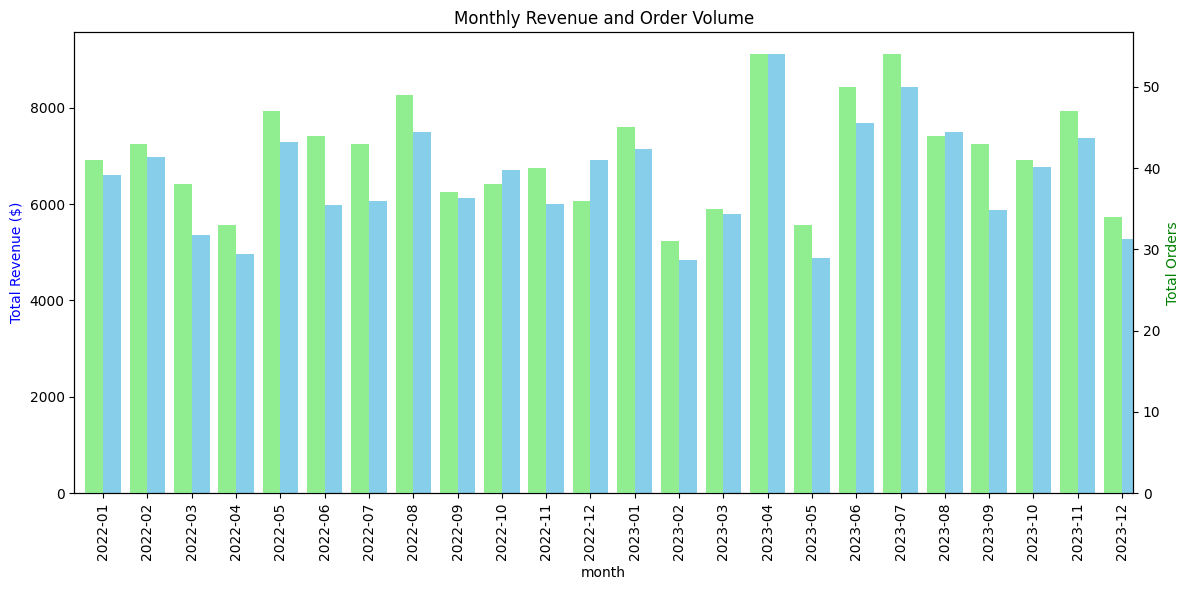

In [15]:
# Plot total revenue and total orders by month
fig, ax1 = plt.subplots(figsize=(12, 6))

ax2 = ax1.twinx()
monthly_summary_df.plot(kind='bar', x='month', y='total_revenue', color='skyblue', ax=ax1, position=0, width=0.4, legend=False)
monthly_summary_df.plot(kind='bar', x='month', y='total_orders', color='lightgreen', ax=ax2, position=1, width=0.4, legend=False)

ax1.set_ylabel('Total Revenue ($)', color='blue')
ax2.set_ylabel('Total Orders', color='green')
plt.title('Monthly Revenue and Order Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('monthly_sales_summary_uploaded.png')
plt.show()


In [16]:
# Close the connection
conn.close()

--------------